<a href="https://colab.research.google.com/github/RujanBhuju/Data-Processing-and-Visualization/blob/main/EXAM1_RujanBhuju_CPSMA-4313-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CPSMA-4313-01

#Exam #1

#Dr Jacob's Data Processing Visualization

#Rujan Bhuju(268963)

#Importing the required library for the exam.


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tabulate import tabulate

#Task-1

Here,
I will Gather the table on 8000 km mountains from the wikipedia page and compute the following tasks.


(a) Store the data as a pandas dataframe


(b) Return only mountains in the ‘Himalayas’


(c) Create a barchart of the Ranges


(d) Create a box-plot of the height in Feet


(e) Report the mean, standard deviation and five number summary of the height in Feet


(f) Report the mean and median of mountains when grouped by their Range.

#(a)Storing the data in pandas dataframe. for the referance i have used my Quiz1.ipynb, Quiz2.ipynb, Quiz8.ipynb from github for this task. The link for my referance is:
#WorkCited

https://github.com/RujanBhuju/Data-Processing-and-Visualization/blob/main/Quiz8.ipynb 

https://github.com/RujanBhuju/Data-Processing-and-Visualization/blob/main/Quiz2.ipynb


https://github.com/RujanBhuju/Data-Processing-and-Visualization/blob/main/Quiz1.ipynb


``I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.''


#Computing the required HTML using request and storing the data as a pandas dataframe.

In [3]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")

computing the table of the wikipedia page.



In [4]:
html_soup.table.find_all('a')


[<a href="/wiki/Mount_Everest" title="Mount Everest">Mount Everest</a>,
 <a href="/wiki/Geography_of_Nepal" title="Geography of Nepal">Nepal</a>,
 <a href="/wiki/K2" title="K2">K2</a>,
 <a href="/wiki/Kangchenjunga" title="Kangchenjunga">Kangchenjunga</a>,
 <a href="/wiki/Lhotse" title="Lhotse">Lhotse</a>,
 <a href="/wiki/Makalu" title="Makalu">Makalu</a>,
 <a href="/wiki/Cho_Oyu" title="Cho Oyu">Cho Oyu</a>,
 <a href="/wiki/Dhaulagiri" title="Dhaulagiri">Dhaulagiri</a>,
 <a href="/wiki/Manaslu" title="Manaslu">Manaslu</a>,
 <a href="/wiki/Nanga_Parbat" title="Nanga Parbat">Nanga Parbat</a>,
 <a href="/wiki/Annapurna" title="Annapurna">Annapurna</a>,
 <a href="/wiki/Gasherbrum_I" title="Gasherbrum I">Gasherbrum I</a>,
 <a href="/wiki/Broad_Peak" title="Broad Peak">Broad Peak</a>,
 <a href="/wiki/Gasherbrum_II" title="Gasherbrum II">Gasherbrum II</a>,
 <a href="/wiki/Shishapangma" title="Shishapangma">Shishapangma</a>]

In [5]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


The output shows the table of the wikipedia page.

#(b)Returning the only mountains in the range of ‘Himalayas’.


In [6]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


The output shows the table of all the mountains that has the range of Himalayas.

#(c)Creating the barchart of the Ranges.

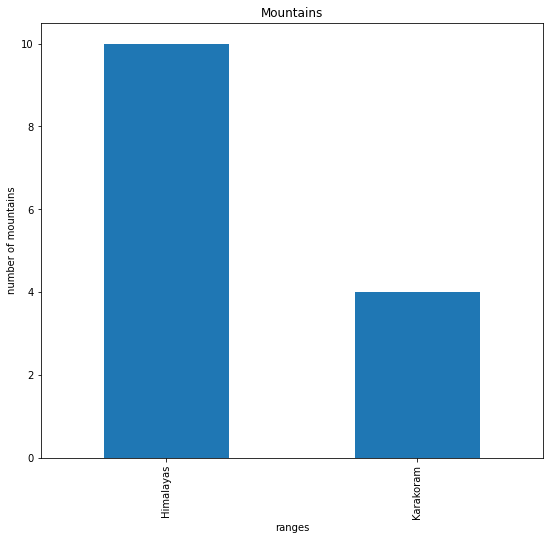

In [8]:
dfg = df.groupby(['Range'])['Range'].count()

dfg.plot(kind='bar', title='Mountains', ylabel='number of mountains',
         xlabel='ranges', figsize=(9, 8))

The output shows the barchart of the ranges.

#(d)Creating a boxplot of the height in feet.

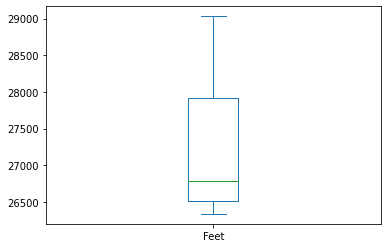

In [ ]:
df.Feet.plot(kind = 'box')


The output shows the boxplot of height in feet.

#(e)Computing the mean, standard deviation and five number summary of the height in Feet.

In [ ]:
df.Feet.describe()


count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

#(f)Computing the mean and median of mountains when grouped by their Range.

In [ ]:
mean = df.groupby('Range').mean()
median = df.groupby('Range').median()
print(tabulate(mean, headers=["Range", "Meters_mean", "Feet_mean"], tablefmt="psql"))
print(tabulate(median, headers=["Range", "Meters_median", "Feet_median"], tablefmt="psql"))

+-----------+---------------+-------------+
| Range     |   Meters_mean |   Feet_mean |
|-----------+---------------+-------------|
| Himalayas |       8319.8  |     27295.9 |
| Karakoram |       8194.25 |     26884   |
+-----------+---------------+-------------+
+-----------+-----------------+---------------+
| Range     |   Meters_median |   Feet_median |
|-----------+-----------------+---------------|
| Himalayas |          8177.5 |       26829.5 |
| Karakoram |          8065.5 |       26461.5 |
+-----------+-----------------+---------------+


The output shows the table with mean and median of the mountain when grouped by their range.

#Task-2

Here,

I will Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface and do the following tasks.


(a) Finding the number of rows are in the dataset.


(b) Finding the average trip total based on payment type.


(c) Finding the number of trips, that had a non-zero recorded time that were above the average time.

For the referance i have used Quiz1.ipynb, Quiz4.ipynb, Quiz7.ipynb from my github page. The link for the refereances are:
#WorkCited


https://github.com/RujanBhuju/Data-Processing-and-Visualization/blob/main/Quiz1.ipynb

https://github.com/RujanBhuju/Data-Processing-and-Visualization/blob/main/Quiz4.ipynb

https://github.com/RujanBhuju/Data-Processing-and-Visualization/blob/main/Quiz7.ipynb

 ``I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.''



Authenticating the database from google cloud.


In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


The output shows that the account has been authenticated.

#(a)Computing the number of rows in the dataset?

In [ ]:
%%bigquery --project data-visualization-338800
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


The output shows the total number of rows of the given dataset.

In [ ]:
%%bigquery --project data-visualization-338800
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` ##table view
LIMIT 4

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,None,None,None,None,8.45,0.00,0.0,0.0,8.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,None,None,None,None,6.05,2.00,0.0,0.0,8.05,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
3,29aea409062ff5c29c33fecff902acd8e58e5e0f,73f6888d8d8f9808f6624377edfa1e2a0a574b06eafbc9...,2014-07-31 09:45:00+00:00,2014-07-31 09:45:00+00:00,0,0.0,None,None,None,None,10.05,2.01,0.0,0.0,12.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None


#(b)Computing the average trip_total based on payment_type.


In [ ]:
%%bigquery --project data-visualization-338800
SELECT payment_type as payment_type, AVG(trip_total) as avg_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trips
0,Unknown,17.649893
1,Mobile,20.339910
2,Cash,12.265548
3,No Charge,15.836177
4,Dispute,15.496588
5,Pcard,10.116931
6,Prepaid,22.377662
7,Way2ride,16.639366
8,Split,18.788039
9,Credit Card,20.524892


The output shows a table with the total average trip and the payment time.

#(c)Computing the number of trips that had a non-zero recorded time which were above the average time.

In [ ]:
%%bigquery --project data-visualization-338800
SELECT COUNT(*) as nonZero_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,nonZero_trips_above_avg_time
0,62143014


The output shows the number of trips that had a non-zero recorded time which were above the average time.



#Task-3

(a)Approximately how long did you work on this exam?

To complete the whole task it took me around 3 hours. the time i was coding was probably 2 hours. most of the time was spent on opening my previous quizzes to see the codes for referance. i also spent some time googling as i had some issues in some questions.


(b) Which was the hardest and easiest topic from this section?

The hardest topic from this section was to calculate the nonZero_trips_above_avg_time and the easiest was to calculate the number of rows.

(c) Which method of gathering data are you most excited to use again?

I am most excited about the web scrapping and SQL.
